# Algorithm evaluation - Yasha Sangani
### Main objective is to decide best algorithm for a given data


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 - Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# Machine failure is target feature
1. 0- not failed (working)
2. 1- failure

### Step 2 : Perform basic data quality checks

In [4]:
df.shape

(136429, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Step 3 - Seperate X and Y (Machine Failure)
Id and product ID are serial number

In [11]:
x = df.drop(columns=["id","Product ID","Machine failure"])
y = df[["Machine failure"]]

In [100]:
x.columns = [ i.replace('[','') for i in x.columns]

In [102]:
x.columns = [ i.replace(']','') for i in x.columns]


In [103]:
x.head()

,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [104]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [105]:
y.value_counts()

Machine failure
0                  134281
1                    2148
dtype: int64

<Axes: xlabel='Machine failure'>

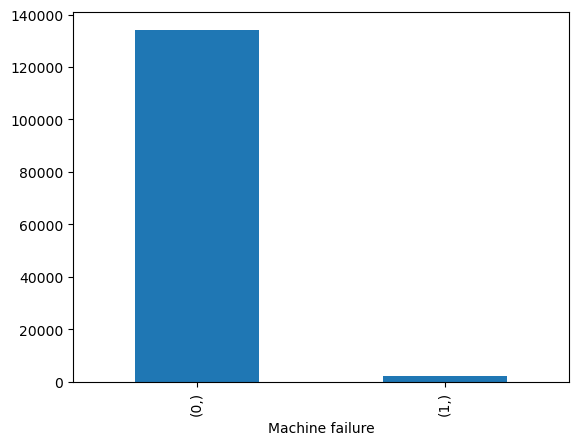

In [106]:
y.value_counts().plot(kind="bar")

### Step 4 - Preprocessing on X

In [107]:
x.dtypes

Type                      object
Air temperature K        float64
Process temperature K    float64
Rotational speed rpm       int64
Torque Nm                float64
Tool wear min              int64
TWF                        int64
HDF                        int64
PWF                        int64
OSF                        int64
RNF                        int64
dtype: object

In [108]:
cat = list(x.columns[x.dtypes == "object"])
con = list(x.columns[x.dtypes != 'object'])

In [109]:
cat

['Type']

In [110]:
con

['Air temperature K',
 'Process temperature K',
 'Rotational speed rpm',
 'Torque Nm',
 'Tool wear min',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [112]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [113]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [114]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

In [115]:
pre = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("con",cat_pipe,cat)
    ]
).set_output(transform="pandas")

In [116]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Air temperature K,num__Process temperature K,num__Rotational speed rpm,num__Torque Nm,num__Tool wear min,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,con__Type_H,con__Type_L,con__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Step 5 - Train Test split

In [117]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [118]:
xtrain.head()

,num__Air temperature K,num__Process temperature K,num__Rotational speed rpm,num__Torque Nm,num__Tool wear min,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,con__Type_H,con__Type_L,con__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [119]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [120]:
xtrain.shape

(109143, 13)

In [121]:
xtest.shape

(27286, 13)

In [122]:
xtrain.columns

Index(['num__Air temperature K', 'num__Process temperature K',
       'num__Rotational speed rpm', 'num__Torque Nm', 'num__Tool wear min',
       'num__TWF', 'num__HDF', 'num__PWF', 'num__OSF', 'num__RNF',
       'con__Type_H', 'con__Type_L', 'con__Type_M'],
      dtype='object')

### Step 6 - Algoritham Evaluation
KNN and SVM are suitable for smaller datasets so i can skip KNN and SVM here

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb


In [124]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [125]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [126]:
def evaluate_single_model(model,xtrain,ytrain,xtest,ytest,cv = 5):
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Evaluate the metrics on train and test 
    f1_train = f1_score(ytrain,ypred_train,average= "macro")
    f1_test = f1_score(ytest,ypred_test,average="macro")

    # Cross validate results
    scores = cross_val_score(model,xtrain,ytrain,cv= cv,scoring = "f1_macro")
    f1_cv = scores.mean()

    e = {
        "Model Name" : model.__class__.__name__,
        "Model" : model,
        "F1 Train" : f1_train,
        "F1_Test" : f1_test,
        "F1 CV" : f1_cv
    }

    print(e)
    return e

In [127]:
def evaluate_and_compare(models,xtrain,ytrain,xtest,ytest,cv = 5):
    # Initialize results in blank list
    results = []

    # Apply for loop on models
    for model in models:
        r = evaluate_single_model(model,xtrain,ytrain,xtest,ytest,cv = 5)
        results.append(r)

    # Convert results to dataframe
    df = pd.DataFrame(results)
    s = df.sort_values(by = "F1 CV", ascending=False).reset_index(drop = True).round(4)
    return s

In [128]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [129]:
comparison = evaluate_and_compare(models, xtrain, ytrain, xtest, ytest)
comparison

{'Model Name': 'LogisticRegression', 'Model': LogisticRegression(), 'F1 Train': 0.9302961192536252, 'F1_Test': 0.9314565053016581, 'F1 CV': 0.930148826025286}
{'Model Name': 'DecisionTreeClassifier', 'Model': DecisionTreeClassifier(), 'F1 Train': 0.9974641142940155, 'F1_Test': 0.8814706648934393, 'F1 CV': 0.8717633456405325}
{'Model Name': 'RandomForestClassifier', 'Model': RandomForestClassifier(), 'F1 Train': 0.9973234537870457, 'F1_Test': 0.930327654764268, 'F1 CV': 0.9274145636435106}
{'Model Name': 'GradientBoostingClassifier', 'Model': GradientBoostingClassifier(), 'F1 Train': 0.9357206926028347, 'F1_Test': 0.9308524696197872, 'F1 CV': 0.9281505105297786}
{'Model Name': 'XGBClassifier', 'Model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
           

,Model Name,Model,F1 Train,F1_Test,F1 CV
0,LogisticRegression,LogisticRegression(),0.9303,0.9315,0.9301
1,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.9357,0.9309,0.9282
2,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9471,0.9305,0.9279
3,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9973,0.9303,0.9274
4,DecisionTreeClassifier,DecisionTreeClassifier(),0.9975,0.8815,0.8718


### Logistic regression is having best result with CV f1 score of 0.9301

In [147]:
best_model = comparison.head(1)["Model"][0]
best_model

LogisticRegression()

In [152]:
imp = pd.Series(best_model.coef_[0] ,index = xtrain.columns)
s = imp.sort_values(ascending=False)
s

num__Torque Nm                1.086979
num__HDF                      0.670939
num__Air temperature K        0.663248
num__PWF                      0.602585
num__TWF                      0.580123
num__OSF                      0.577628
num__Rotational speed rpm     0.480103
num__Tool wear min            0.327679
con__Type_L                   0.116090
con__Type_H                   0.105136
num__RNF                     -0.007244
con__Type_M                  -0.226459
num__Process temperature K   -0.433933
dtype: float64

<Axes: >

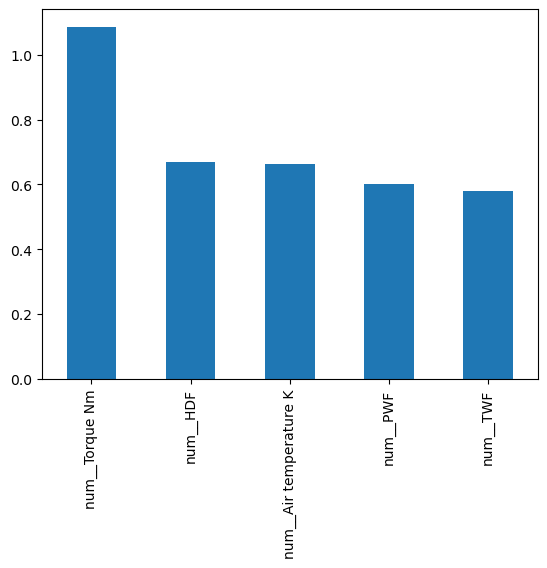

In [153]:
s.head(5).plot(kind = "bar")

### Step 6 - Evaluate the best model

In [154]:
best_model.score(xtrain,ytrain)

0.9961884866642845

In [155]:
best_model.score(xtest,ytest)

0.9961518727552591

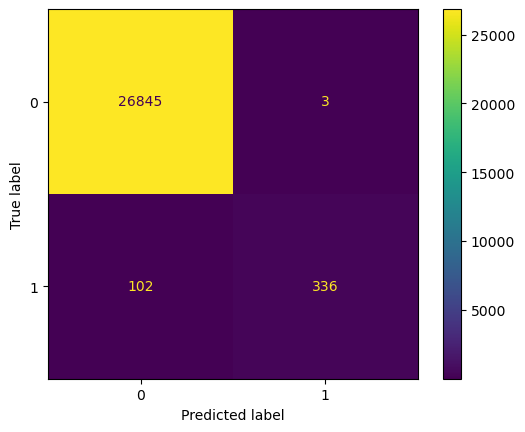

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model,xtest,ytest)

In [157]:
ypred_test = best_model.predict(xtest)
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [158]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [159]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [160]:
from sklearn.metrics import RocCurveDisplay

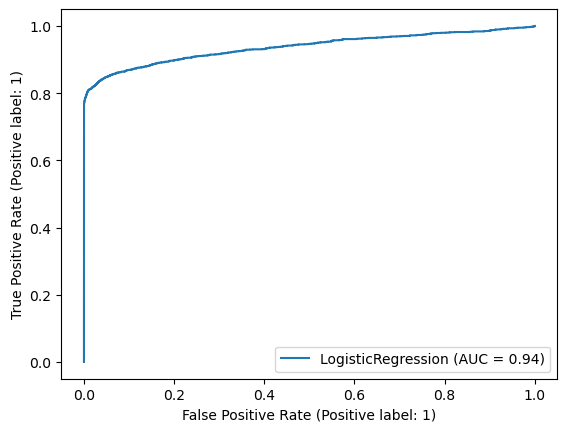

In [161]:
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

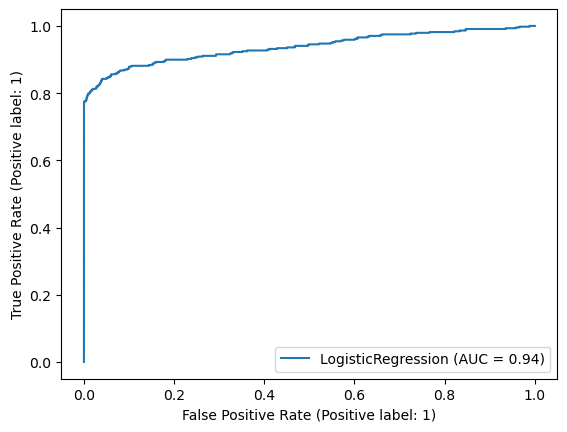

In [162]:
RocCurveDisplay.from_estimator(best_model,xtest,ytest)

### ROC (Reciever Operator Characterstics) AUC (Area Under Curve) score is 0.95 in test hence it is a good model

In [164]:
auc_scores = cross_val_score(best_model,xtrain,ytrain,cv = 5 , scoring = "roc_auc")
auc_scores

array([0.94160001, 0.93028717, 0.95428148, 0.92771629, 0.92533918])

In [165]:
auc_scores.mean()

0.9358448272945527

### Step - 8 Out of Sample prediction

In [166]:
xnew = pd.read_csv("test_machine.csv")
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [167]:
xnew.columns = [ i.replace('[','') for i in xnew.columns]

In [168]:
xnew.columns = [ i.replace(']','') for i in xnew.columns]

In [169]:
xnew

,id,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [170]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature K', 'Process temperature K',
                                  'Rotational speed rpm', 'Torque Nm',
                                  'Tool wear min', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [171]:
xnew_pre = pre.fit_transform(xnew)
xnew_pre

,num__Air temperature K,num__Process temperature K,num__Rotational speed rpm,num__Torque Nm,num__Tool wear min,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,con__Type_H,con__Type_L,con__Type_M
0,1.313830,1.126570,-0.153806,-0.274579,-0.693494,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
1,0.990824,0.765635,1.375097,-1.356341,-1.366729,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
2,0.775487,0.332512,0.031949,-0.309854,-0.129855,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
3,0.129475,-0.244985,-0.296694,0.854217,-1.554608,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,0.0,1.0
4,1.906008,1.704068,-0.039496,0.113445,0.151964,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,1.313830,1.054383,-0.260972,0.007620,-1.398042,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
90950,-1.054879,-0.100611,0.153403,-0.768427,-1.147536,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
90951,-2.293068,-2.699348,-0.139517,0.125203,1.294897,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0
90952,-0.947211,-1.544354,0.096248,-0.004138,-0.552584,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,0.0,1.0,0.0


### Predict the result with probability

In [172]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0])

In [174]:
probs = best_model.predict_proba(xnew_pre)[:,1]
probs

array([0.00214928, 0.00104728, 0.00268489, ..., 0.00308049, 0.00242157,
       0.00228788])

In [175]:
results = xnew[["id"]]
results["Machine_failure_pred"] = preds
results["Machine_failure_prob"] = probs
results 

,id,Machine_failure_pred,Machine_failure_prob
0,136429,0,0.002149
1,136430,0,0.001047
2,136431,0,0.002685
3,136432,0,0.003027
4,136433,0,0.003732
...,...,...,...
90949,227378,0,0.002272
90950,227379,0,0.000445
90951,227380,0,0.003080
90952,227381,0,0.002422


In [176]:
results = results.round(4)
results

,id,Machine_failure_pred,Machine_failure_prob
0,136429,0,0.0021
1,136430,0,0.0010
2,136431,0,0.0027
3,136432,0,0.0030
4,136433,0,0.0037
...,...,...,...
90949,227378,0,0.0023
90950,227379,0,0.0004
90951,227380,0,0.0031
90952,227381,0,0.0024


In [177]:
results["Machine_failure_pred"].value_counts()

0    89848
1     1106
Name: Machine_failure_pred, dtype: int64

<Axes: >

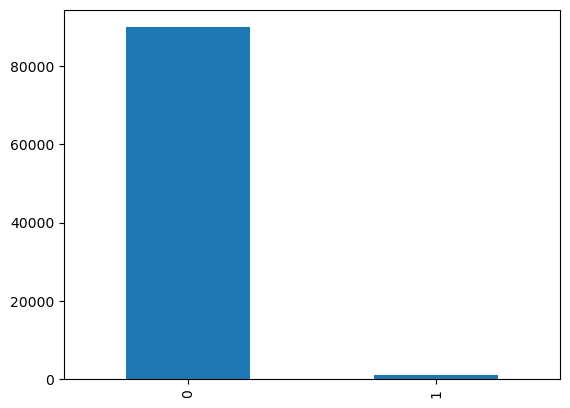

In [178]:
results["Machine_failure_pred"].value_counts().plot(kind="bar")

### Saving the model with joblib

In [179]:
import joblib

In [180]:
joblib.dump(best_model,filename= "Machine_logisticRegression.joblib")

['Machine_logisticRegression.joblib']

### Loading model using joblib

In [181]:
m = joblib.load(filename= "Machine_logisticRegression.joblib")
m

LogisticRegression()